1. 필요한 라이브러리

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline                            
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
# 그래프 해상도 업그레이드
%config InlineBackend.figure_format = 'retina'

In [6]:
# 코드 연산 속도 측정
from tqdm.auto import tqdm
# 경고문 무시
import warnings
warnings.filterwarnings('ignore')

2. 데이터 살펴보기

In [8]:
x_train = pd.read_csv('/Users/hzzang/jeju/train.csv')
x_test = pd.read_csv('/Users/hzzang/jeju/test.csv')

2.1 데이터 확인하기

In [10]:
x_train.head()
x_test.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


In [11]:
# 행/열 확인
print(x_train.shape)
print(x_test.shape)

(4701217, 23)
(291241, 22)


2.2 데이터 요약정보 확인

In [13]:
print(x_train.info())
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [14]:
# 결측치 존재 여부 확인
print(x_train.isnull().sum())
print(x_test.isnull().sum())

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64
id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type      

In [15]:
## 기초통계량 확인
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
base_date,4701217.0,2.021672e+07,4555.708569,2.021090e+07,2.021110e+07,2.022013e+07,2.022050e+07,2.022073e+07
base_hour,4701217.0,1.192820e+01,6.722092,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
lane_count,4701217.0,1.836651e+00,0.687751,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
road_rating,4701217.0,1.049585e+02,1.840107,1.030000e+02,1.030000e+02,1.060000e+02,1.070000e+02,1.070000e+02
multi_linked,4701217.0,4.762597e-04,0.021818,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
connect_code,4701217.0,2.660218e-01,5.227760,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.030000e+02
maximum_speed_limit,4701217.0,6.125329e+01,12.133539,3.000000e+01,5.000000e+01,6.000000e+01,7.000000e+01,8.000000e+01
vehicle_restricted,4701217.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
weight_restricted,4701217.0,5.618742e+03,13953.433235,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+04
height_restricted,4701217.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


3. EDA

3.1 데이터 타입 변경

대부분의 값이 int64, float64로 되어 있음
데이터프레임의 용량이 크므로, int64인 컬럼의 데이터 타입을 int32로 변경함
'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted', 'height_restricted', 'target' 컬럼: float32로 변경
'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude' 컬럼: float32로 변형할 경우 일부 정보 소실되므로, 그대로 둠

In [19]:
# 데이터 타입 변경
to_int32 = ["base_date", "base_hour", "lane_count", "road_rating", "multi_linked", "connect_code", "road_type"]
to_float32 = ["vehicle_restricted", "height_restricted", "maximum_speed_limit", "weight_restricted", "target"]

for i in to_int32:
    x_train[i] = x_train[i].astype("int32")
for j in to_float32:
    x_train[j] = x_train[j].astype("float32")

print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int32  
 2   day_of_week            object 
 3   base_hour              int32  
 4   lane_count             int32  
 5   road_rating            int32  
 6   road_name              object 
 7   multi_linked           int32  
 8   connect_code           int32  
 9   maximum_speed_limit    float32
 10  vehicle_restricted     float32
 11  weight_restricted      float32
 12  height_restricted      float32
 13  road_type              int32  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

3.2 변수

In [21]:
# 한 가지 값만 존재하는 변수 찾기
one_value_columns = []

for i in x_train.columns[2:]:
    if len(x_train[i].value_counts()) < 2:
        one_value_columns.append(i)

print(len(one_value_columns))
print(one_value_columns)

2
['vehicle_restricted', 'height_restricted']


In [22]:
# 값 확인
print(x_train['vehicle_restricted'].value_counts())
print(x_train['height_restricted'].value_counts())

vehicle_restricted
0.0    4701217
Name: count, dtype: int64
height_restricted
0.0    4701217
Name: count, dtype: int64


In [23]:
# 해당 컬럼 제거
x_train = x_train.drop(['vehicle_restricted', 'height_restricted'], axis=1)
x_test = x_test.drop(['vehicle_restricted', 'height_restricted'], axis=1)

변수들의 관계 파악
- 상관관계 분석 (히트맵 활용)
- target 변수는 최고속도제한('maximum_speed_limit') 변수와 가장 높은 양의 상관관계를 보이고, 이외에도 'weight_restricted', 'road_type' 변수와 양의 상관관계를 보임
- 'road_rating', 'lane_count' 컬럼은 음의 상관관계를 보임

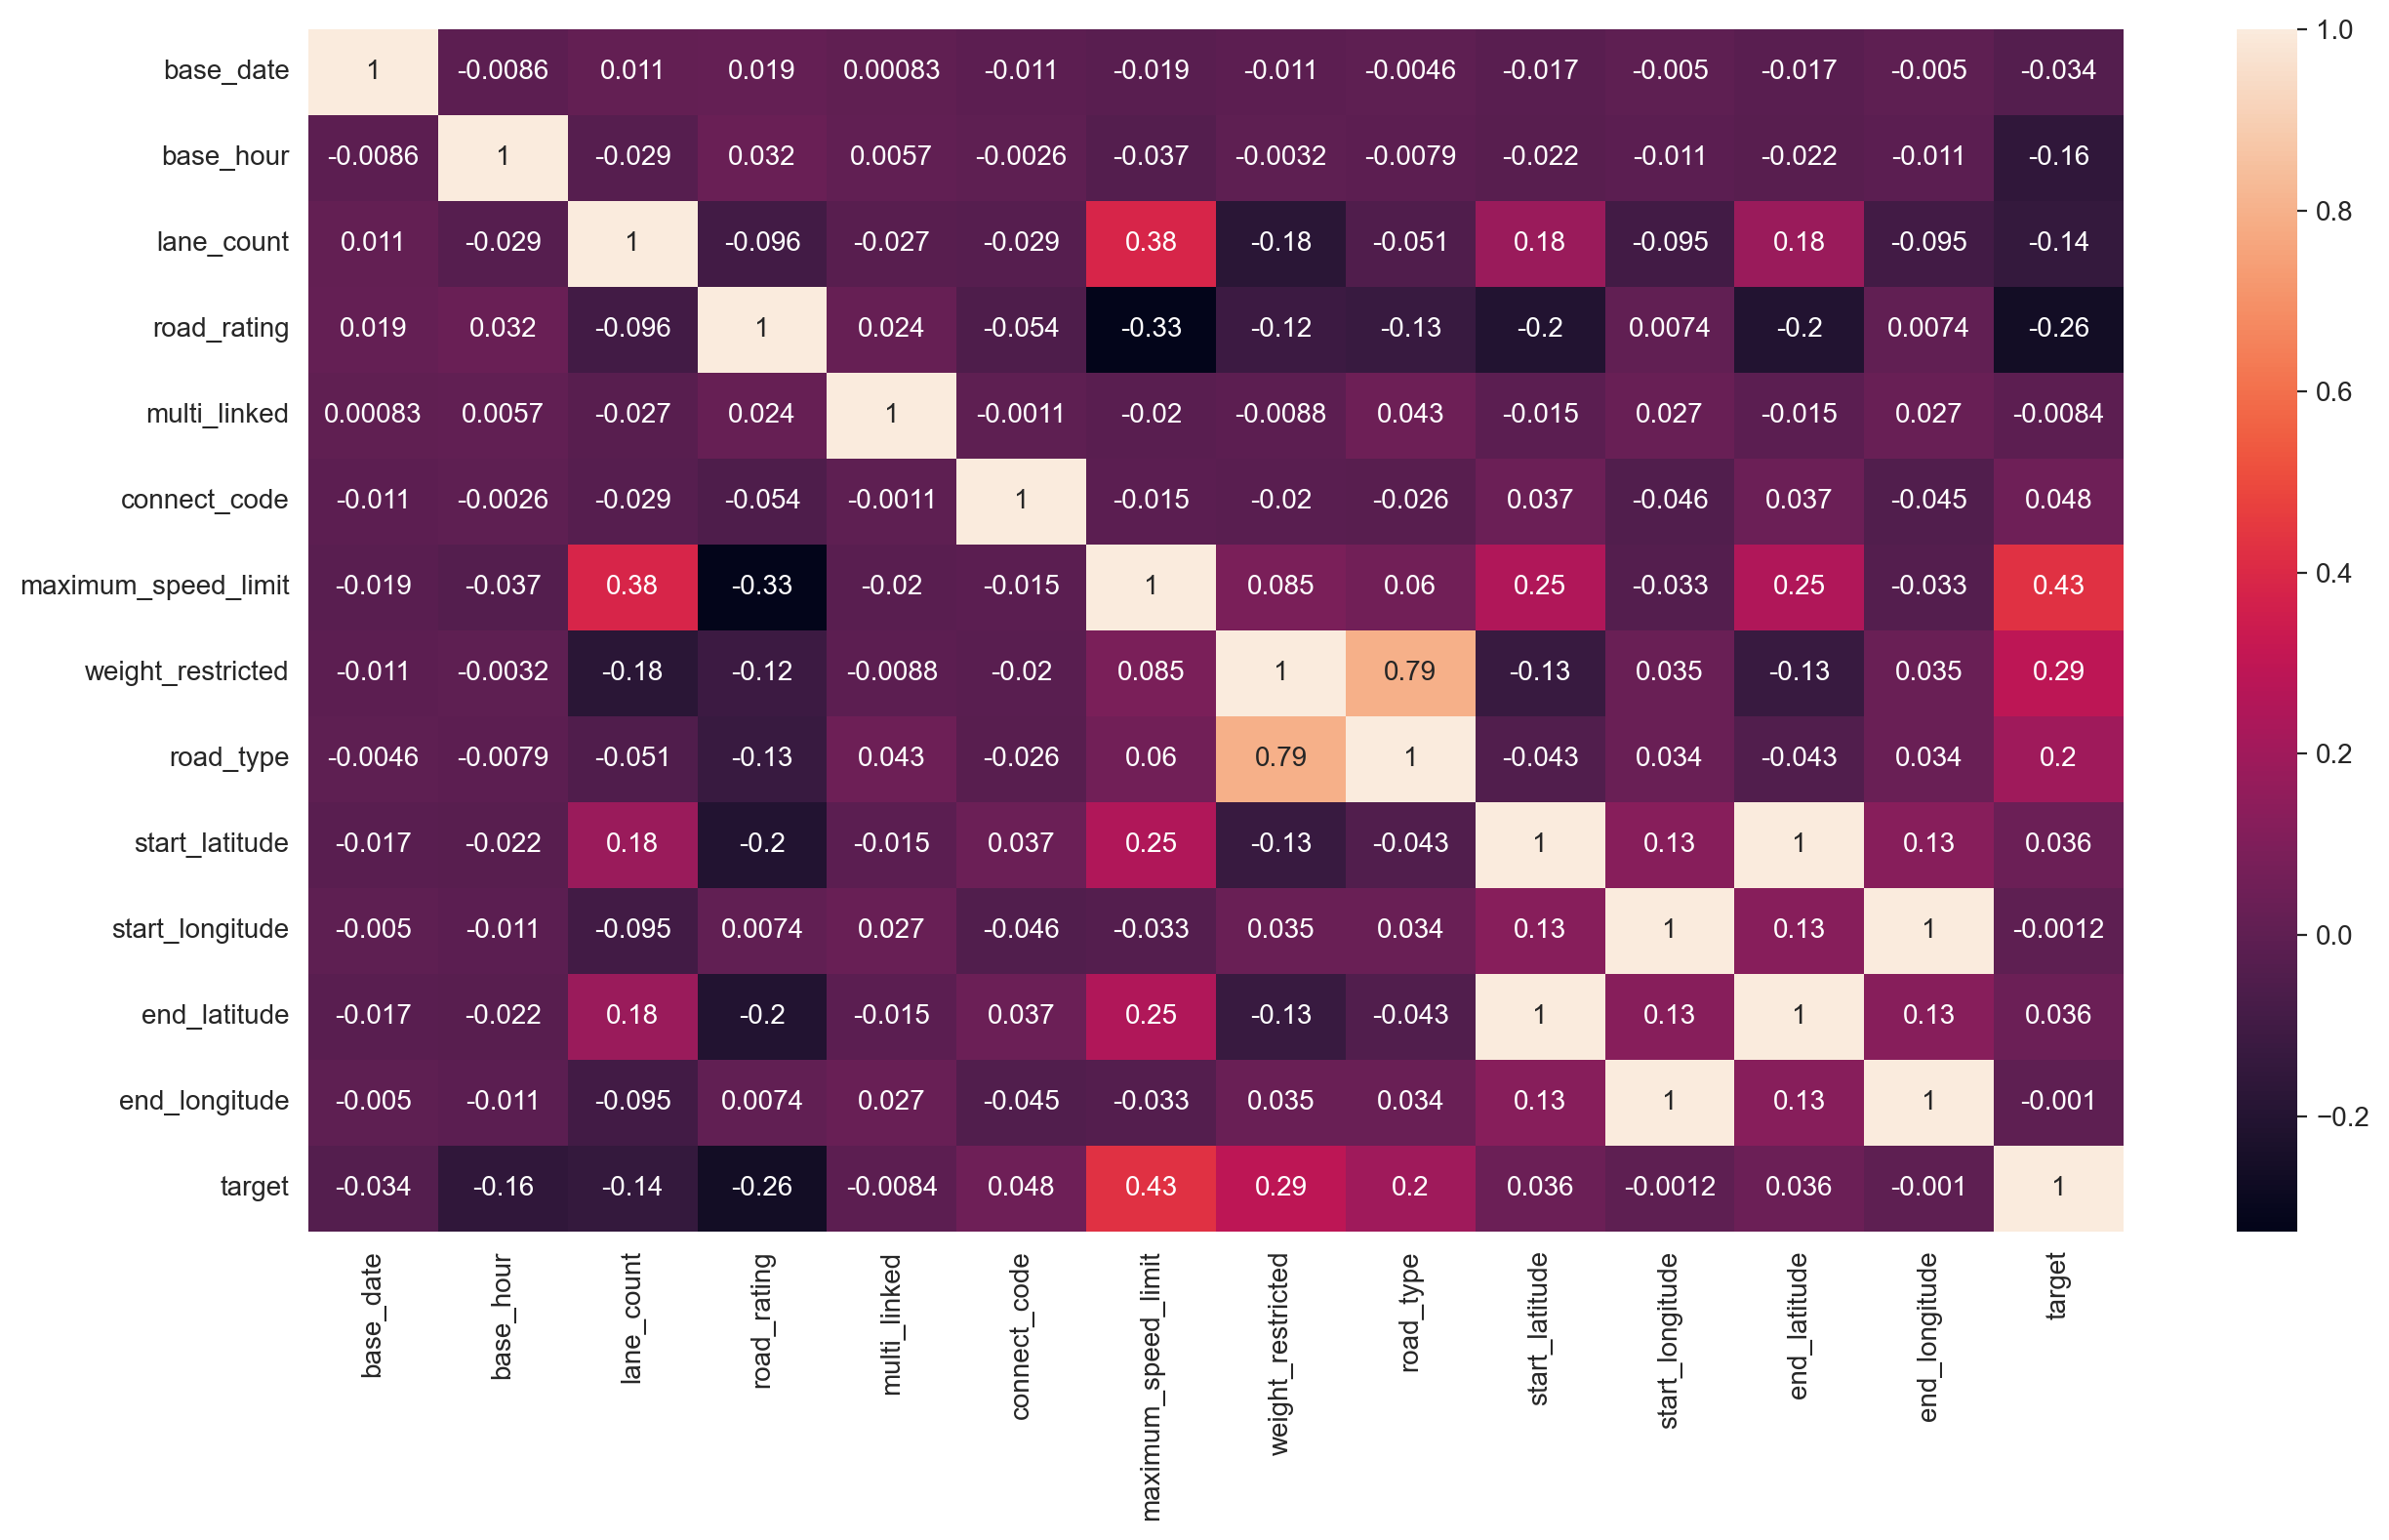

In [25]:
plt.figure(figsize=(15, 8))

# 숫자형 컬럼만 선택해서 상관관계 히트맵 그리기
numeric_cols = x_train.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True)
plt.show()


# 변수별 특징 파악
- 최고속도제한('maximum_speed_limit') 컬럼
- 범주별로 평균속도('target') 값에 차이가 있는 것으로 보임
- 이상치가 존재하는 것으로 보임 (추후 제거)

In [27]:
print(x_train['maximum_speed_limit'].value_counts())
print(x_train.groupby('maximum_speed_limit')['target'].mean())

maximum_speed_limit
60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: count, dtype: int64
maximum_speed_limit
30.0    32.220825
40.0    62.774078
50.0    35.492229
60.0    42.316288
70.0    41.366207
80.0    60.703697
Name: target, dtype: float32


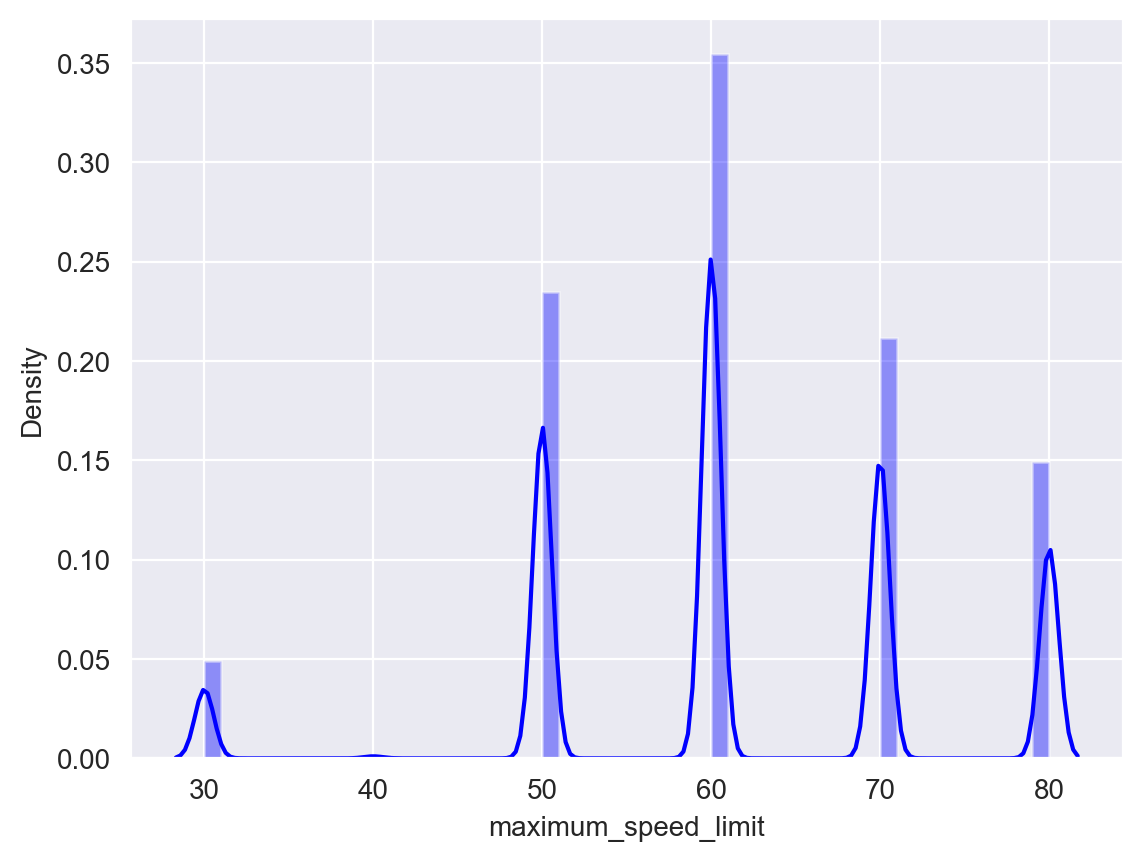

In [28]:
## 범주별 분포
sns.distplot(x_train['maximum_speed_limit'], color='blue')
plt.show()

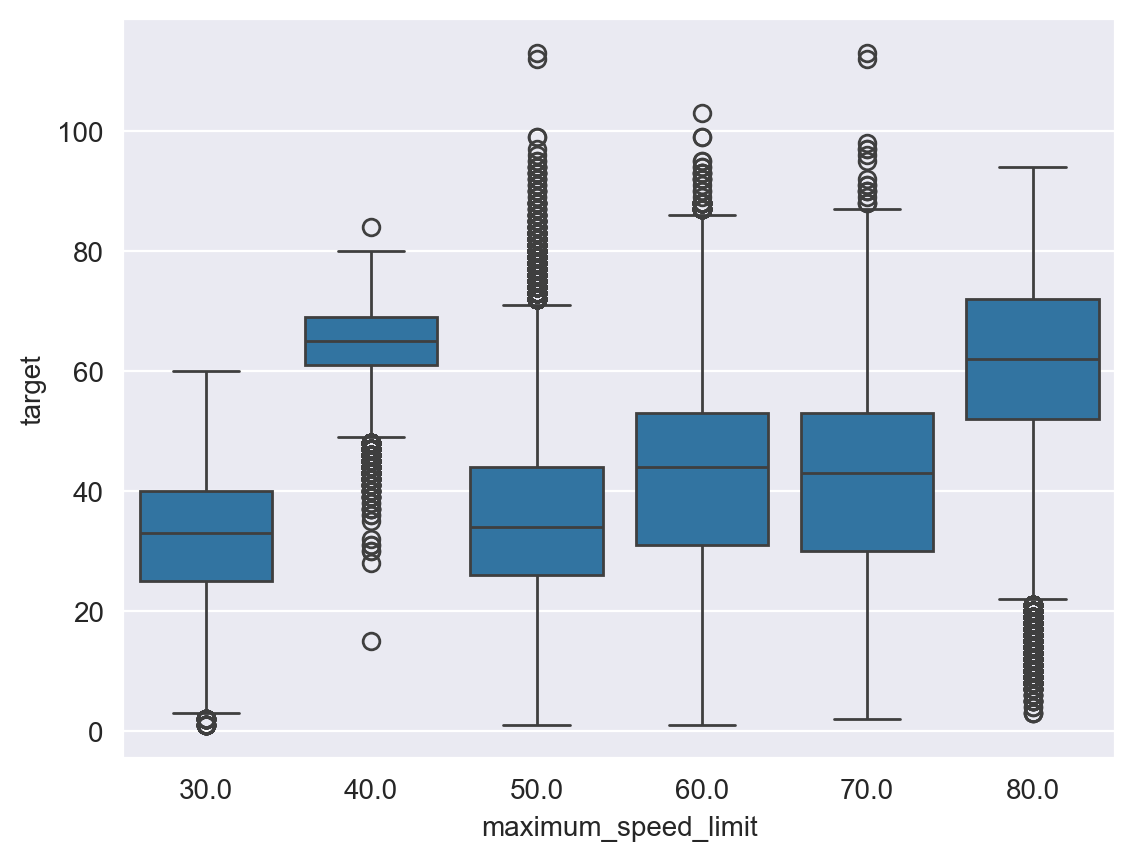

In [29]:
## 상자그림
sns.boxplot(x='maximum_speed_limit', y='target', data=x_train)
plt.show()

- 통과제한하중('weight_restricted') 컬럼
- 통과제한하중이 없는 경우, 평균속도가 가장 낮음

In [31]:
print(x_train['weight_restricted'].value_counts())
print(x_train.groupby('weight_restricted')['target'].mean())

weight_restricted
0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: count, dtype: int64
weight_restricted
0.0        40.955696
32400.0    47.453350
43200.0    57.883888
50000.0    47.088665
Name: target, dtype: float32


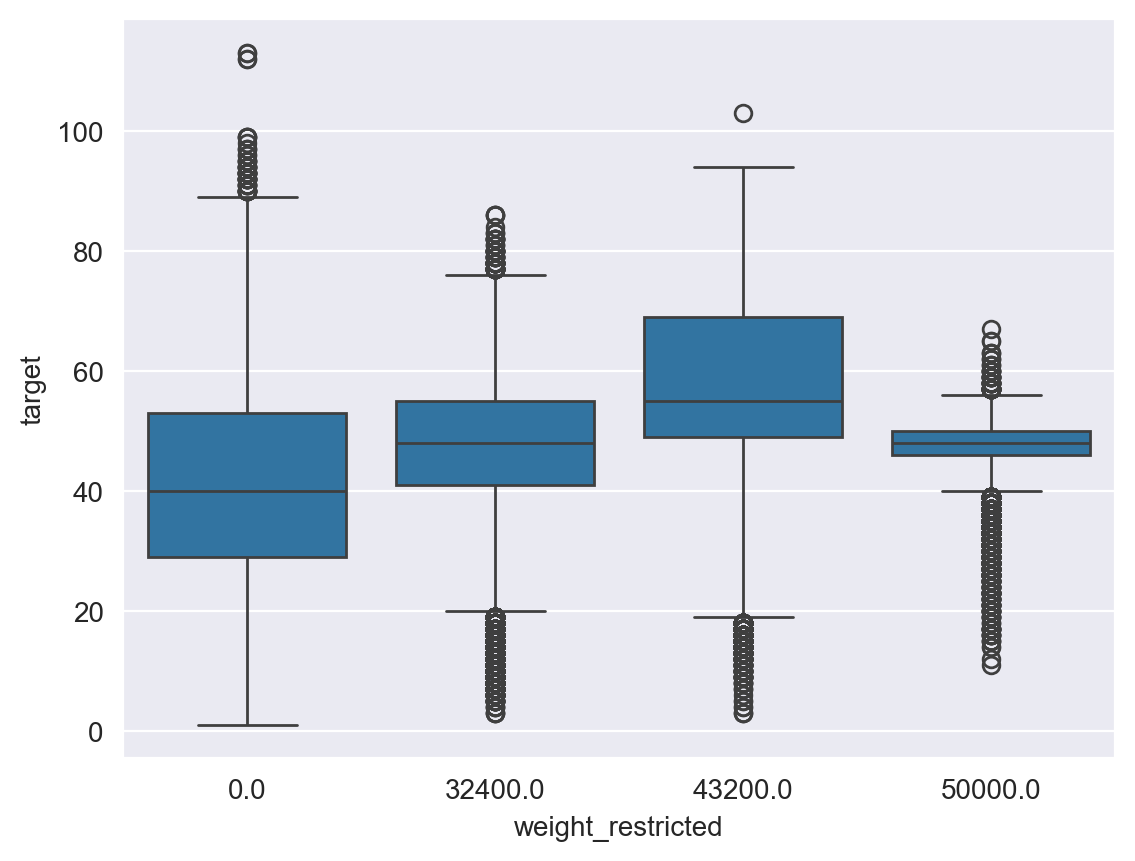

In [32]:
## 상자그림
sns.boxplot(x='weight_restricted', y='target', data=x_train)
plt.show()

- 차로수('lane_count') 컬럼
- 2차선일 때, 평균속도가 가장 높음

In [34]:
print(x_train['lane_count'].value_counts())
print(x_train.groupby('lane_count')['target'].mean())

lane_count
2    2352092
1    1558531
3     790594
Name: count, dtype: int64
lane_count
1    43.570560
2    44.915714
3    34.917782
Name: target, dtype: float32


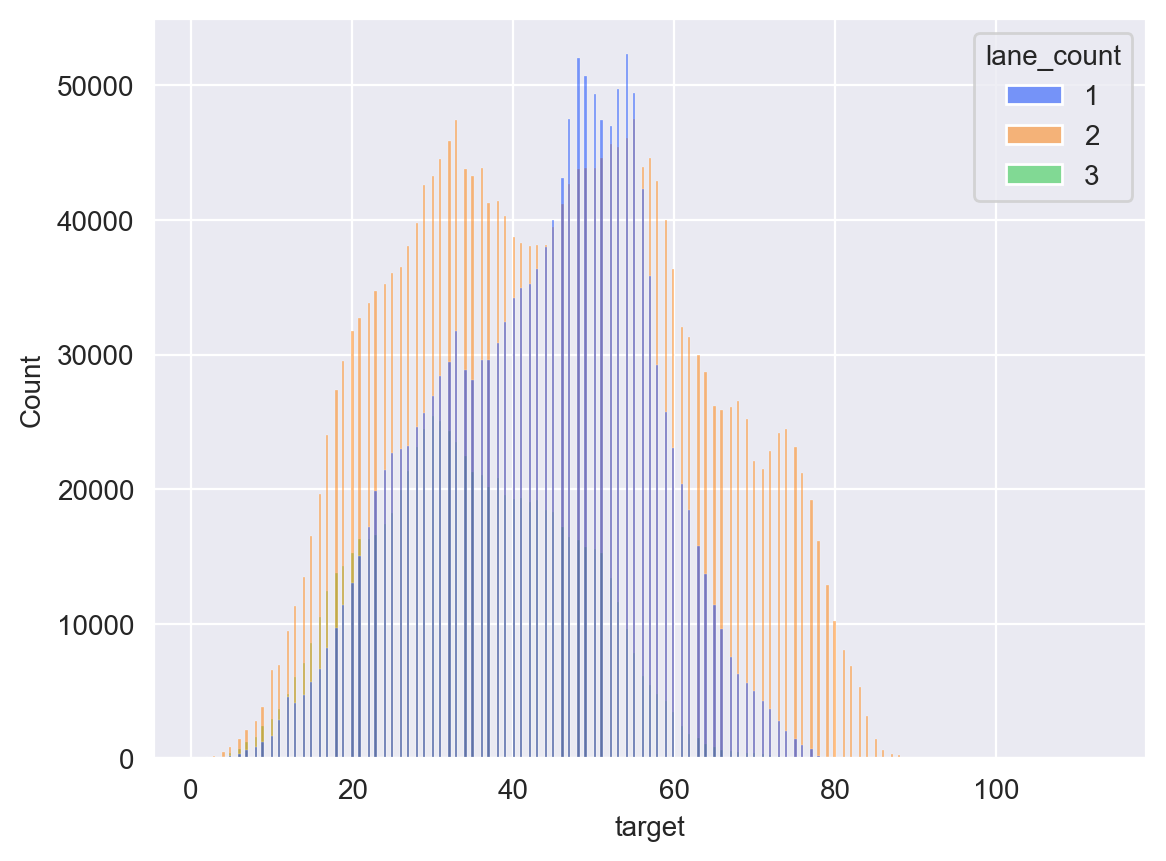

In [35]:
sns.histplot(x=x_train['target'], hue=x_train['lane_count'], 
             palette='bright')
plt.show()

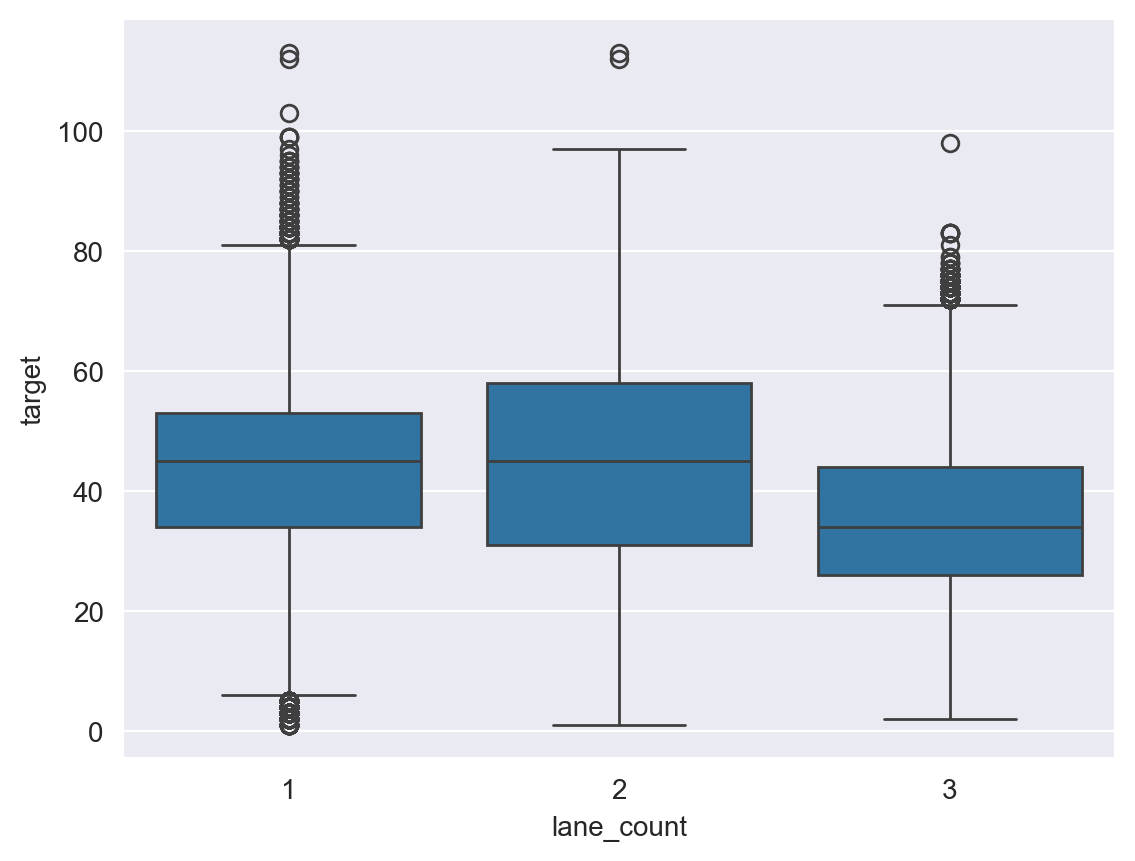

In [36]:
## 상자그림
sns.boxplot(x='lane_count', y='target', data=x_train)
plt.show()

도로등급('road_rating') 컬럼
-103(일반국도), 106(지방도), 107(시도/군도)인 것으로 추측됨
-도로등급이 107일 때, 평균속도가 가장 낮음

In [38]:
print(x_train['road_rating'].value_counts())
print(x_train.groupby('road_rating')['target'].mean())

road_rating
103    2159511
107    1582214
106     959492
Name: count, dtype: int64
road_rating
103    46.388470
106    48.021549
107    34.701408
Name: target, dtype: float32


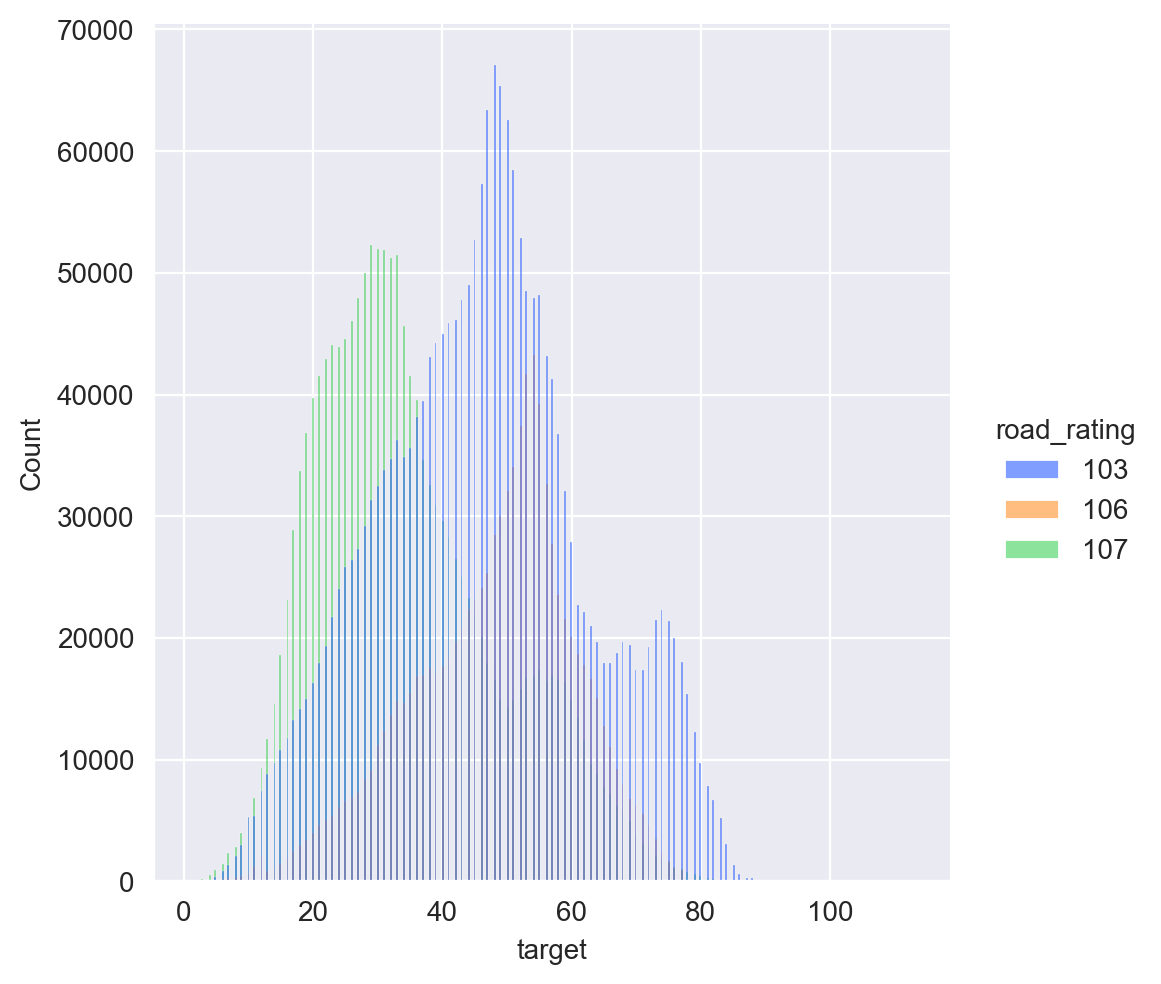

In [39]:
sns.displot(x = x_train['target'], hue = x_train['road_rating'], palette='bright')
plt.show()

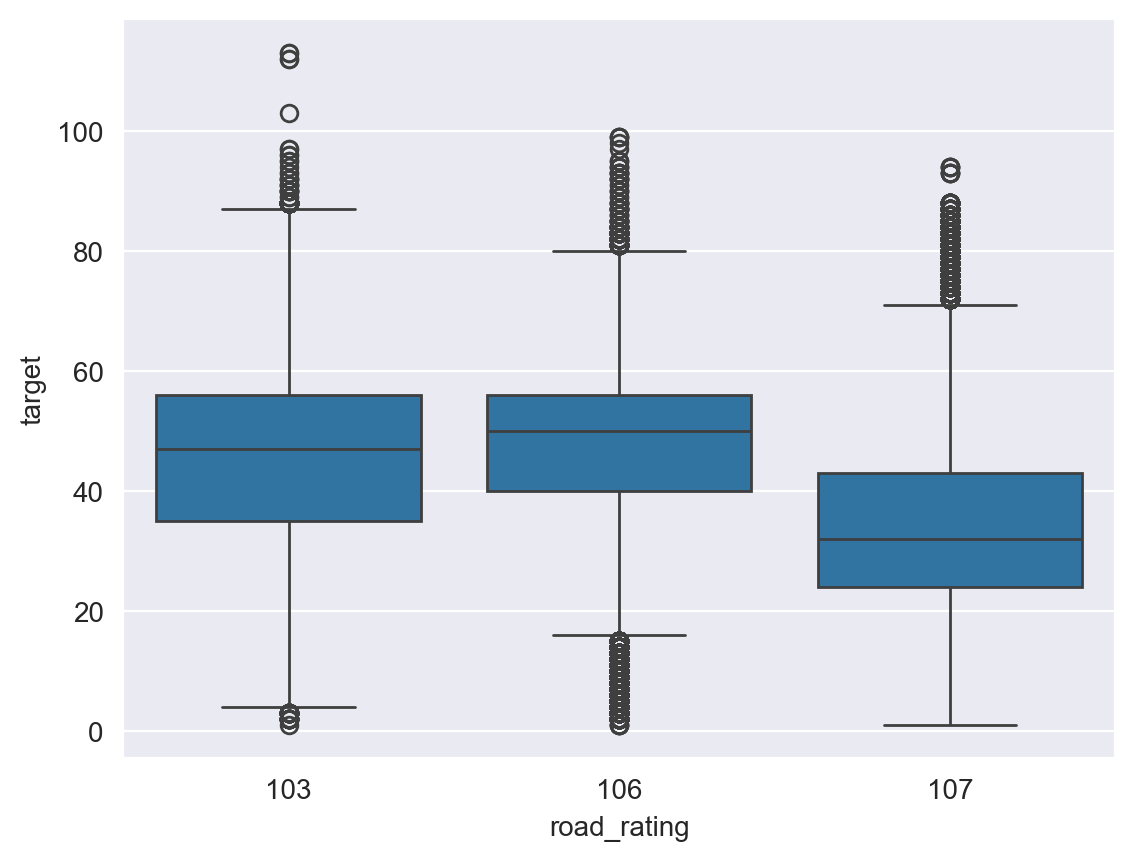

In [40]:
## 상자그림
sns.boxplot(x='road_rating', y='target', data=x_train)
plt.show()

도로유형('road_type') 컬럼
-도로유형에 따른 평균속도에 차이가 존재함

In [42]:
print(x_train['road_type'].value_counts())
print(x_train.groupby('road_type')['target'].mean())

road_type
0    3737117
3     964100
Name: count, dtype: int64
road_type
0    41.160931
3    49.097122
Name: target, dtype: float32


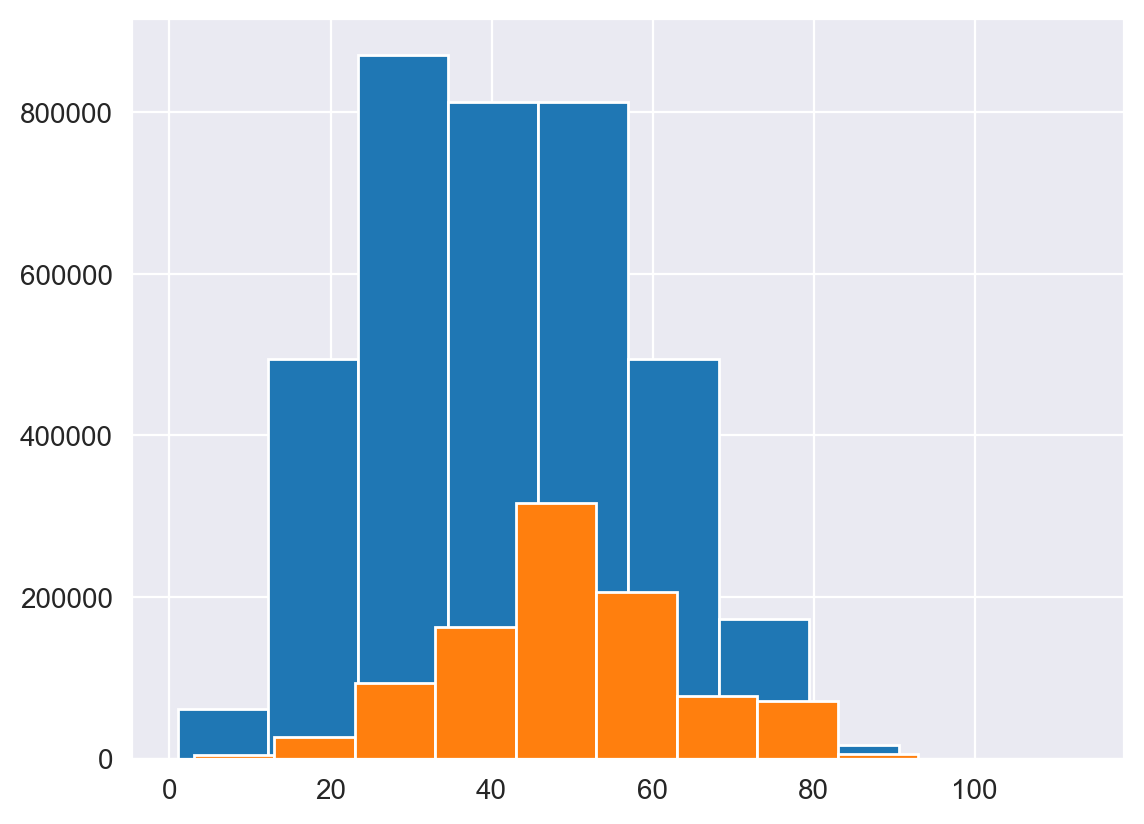

In [43]:
## 시각화
x_train.groupby('road_type')['target'].hist()
plt.show()

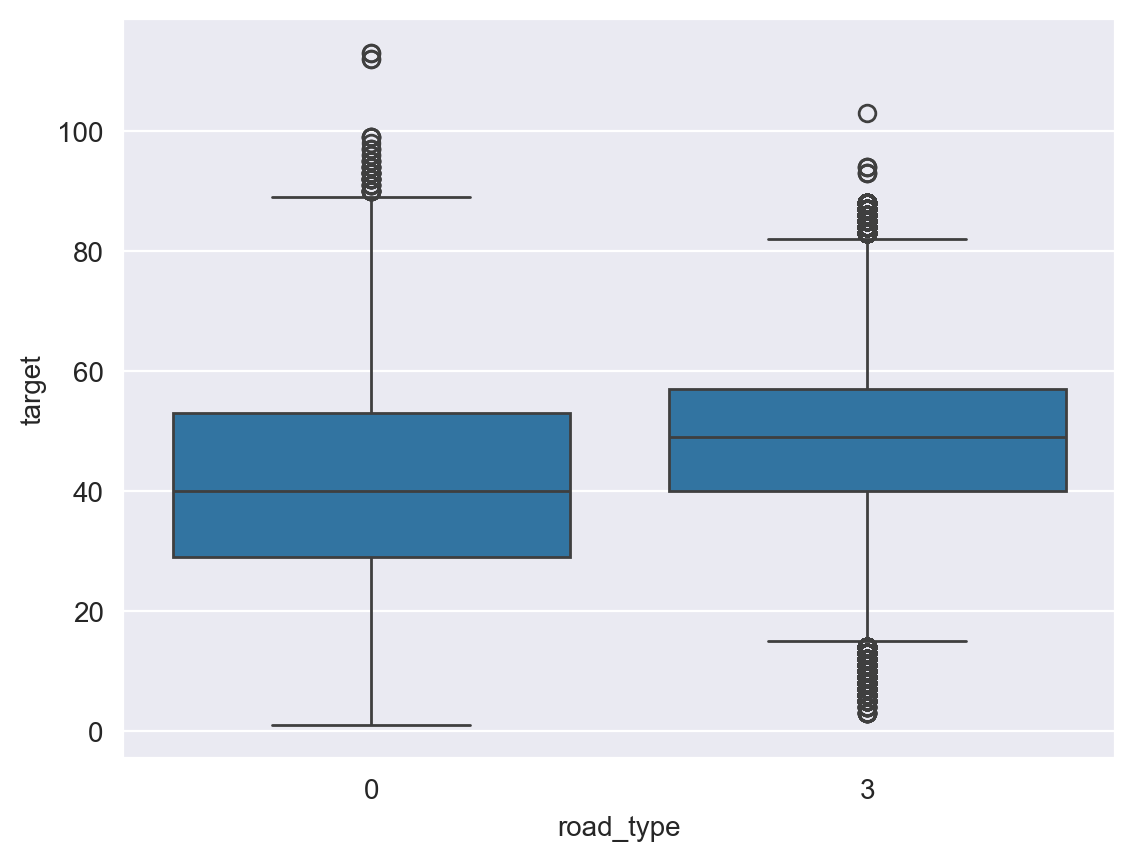

In [44]:
## 상자그림
sns.boxplot(x='road_type', y='target', data=x_train)
plt.show()

중용구간 여부('multi_linked') 컬럼
-multi_linked=1(중용구간인 곳)에 비해 multi_linked=0(중용구간이 아닌 곳)이 훨씬 많으므로, 해당 컬럼은 제거함

In [46]:
print(x_train['multi_linked'].value_counts())
print(x_train.groupby('multi_linked')['target'].mean())

multi_linked
0    4698978
1       2239
Name: count, dtype: int64
multi_linked
0    42.791370
1    36.642696
Name: target, dtype: float32


In [47]:
# 해당 컬럼 제거
x_train = x_train.drop('multi_linked', axis=1)
x_test = x_test.drop('multi_linked', axis=1)

연결로 코드('connect_code') 컬럼
-0(연결로 아님), 103(일반국도 연결로)인 것으로 추측됨
-연결로 코드에 따른 평균속도에 차이가 존재하지만, 데이터의 불균형으로 인해 해당 컬럼은 제거함

In [50]:
print(x_train['connect_code'].value_counts())
print(x_train.groupby('connect_code')['target'].mean())

connect_code
0      4689075
103      12142
Name: count, dtype: int64
connect_code
0      42.749191
103    57.947044
Name: target, dtype: float32


In [52]:
# 해당 컬럼 제거
x_train = x_train.drop('connect_code', axis=1)
x_test = x_test.drop('connect_code', axis=1)

시간대('base_hour') 컬럼
-21~23시, 0~7시에는 상대적으로 평균 속도가 높은 편임. 즉, 통행량이 적음
-반면 대략 8~9시, 10~20시에는 상대적으로 평균 속도가 낮은 편임. 특히 17~18시에 가장 낮음
-파생변수로 활용할 수 있을 것으로 판단됨

In [54]:
# 시간대별 평균 속도 비교
print(x_train.groupby('base_hour')['target'].mean().sort_values(ascending=False))

base_hour
3     50.543255
2     50.278660
1     49.763298
4     49.747524
0     48.742199
5     47.201141
23    45.807739
6     45.549030
22    43.989861
7     43.682270
21    42.173431
8     41.656292
20    41.113808
9     40.875938
10    40.222233
19    40.104111
12    39.838539
11    39.824593
13    39.731472
14    39.561119
15    39.351700
16    39.127930
17    38.473362
18    38.241257
Name: target, dtype: float32


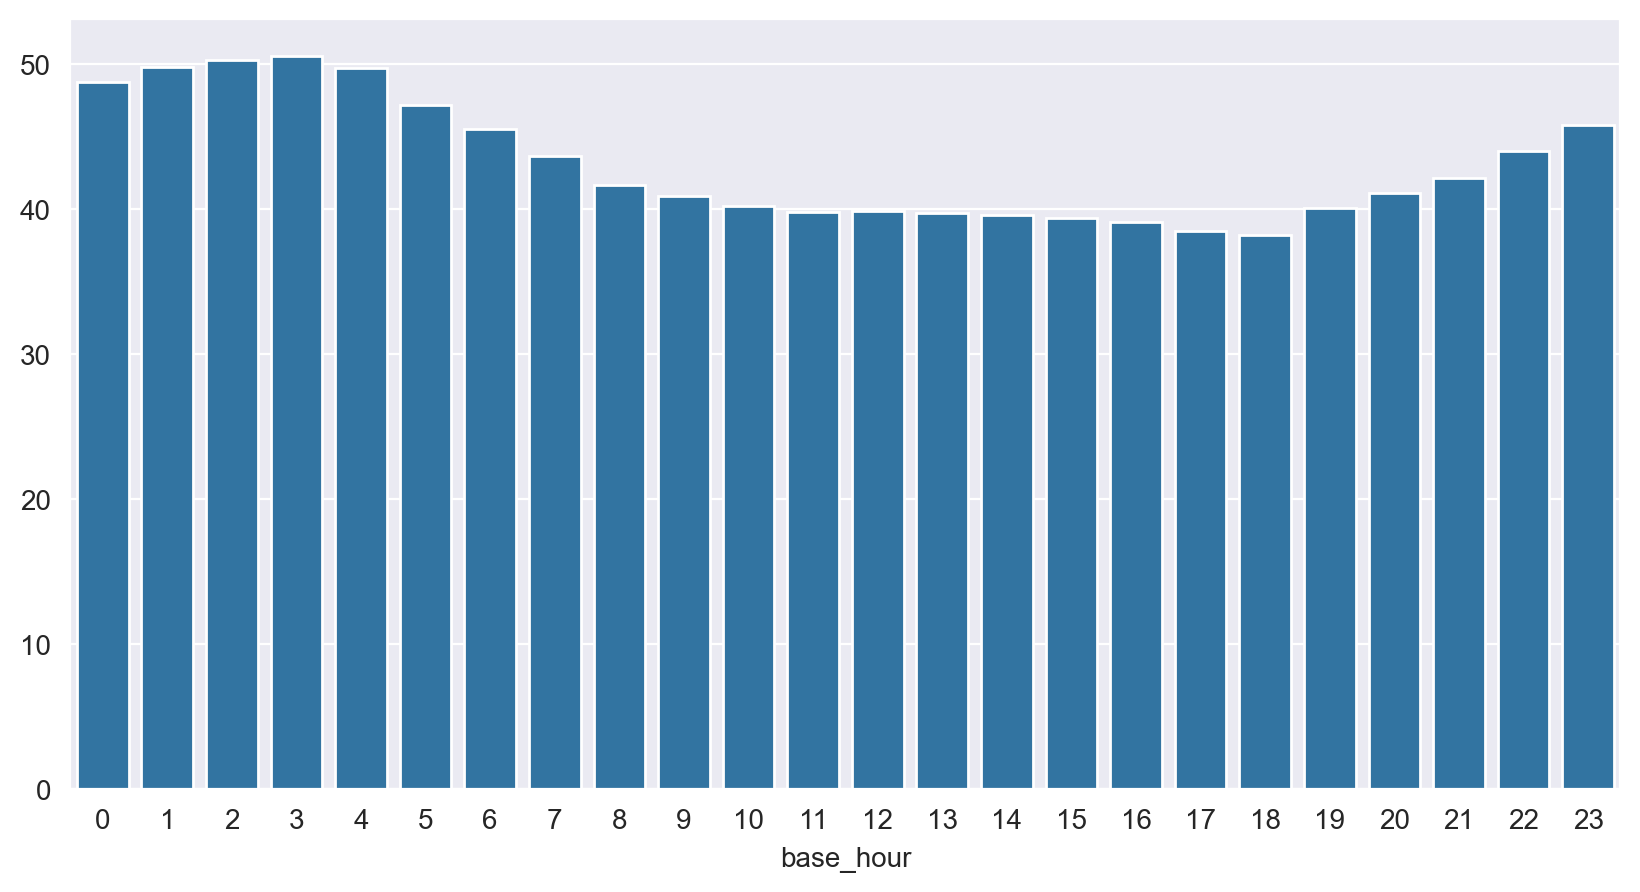

In [56]:
# 시간대별 평균 target값 시각화
base_hour_mean = x_train.groupby('base_hour')['target'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=base_hour_mean.index, y=base_hour_mean.values)
plt.show()

도로명('road_name') 컬럼
-결측치('-')가 569,463개 존재함 (추후 대체)

In [61]:
print(x_train['road_name'].value_counts())

road_name
일반국도12호선    1046092
-            569463
일반국도16호선     554510
일반국도95호선     248181
일반국도11호선     215701
             ...   
애원로            7718
아봉로            7342
남조로            6813
호서중앙로          2819
호근로             587
Name: count, Length: 61, dtype: int64


target 변수 파악하기
- 첨도가 어느 정도 존재하지만, 왜도가 거의 없으므로 변환을 따로 수행하지 않아도 될 것으로 판단함


 skew = 0.14 and kurt = -0.59



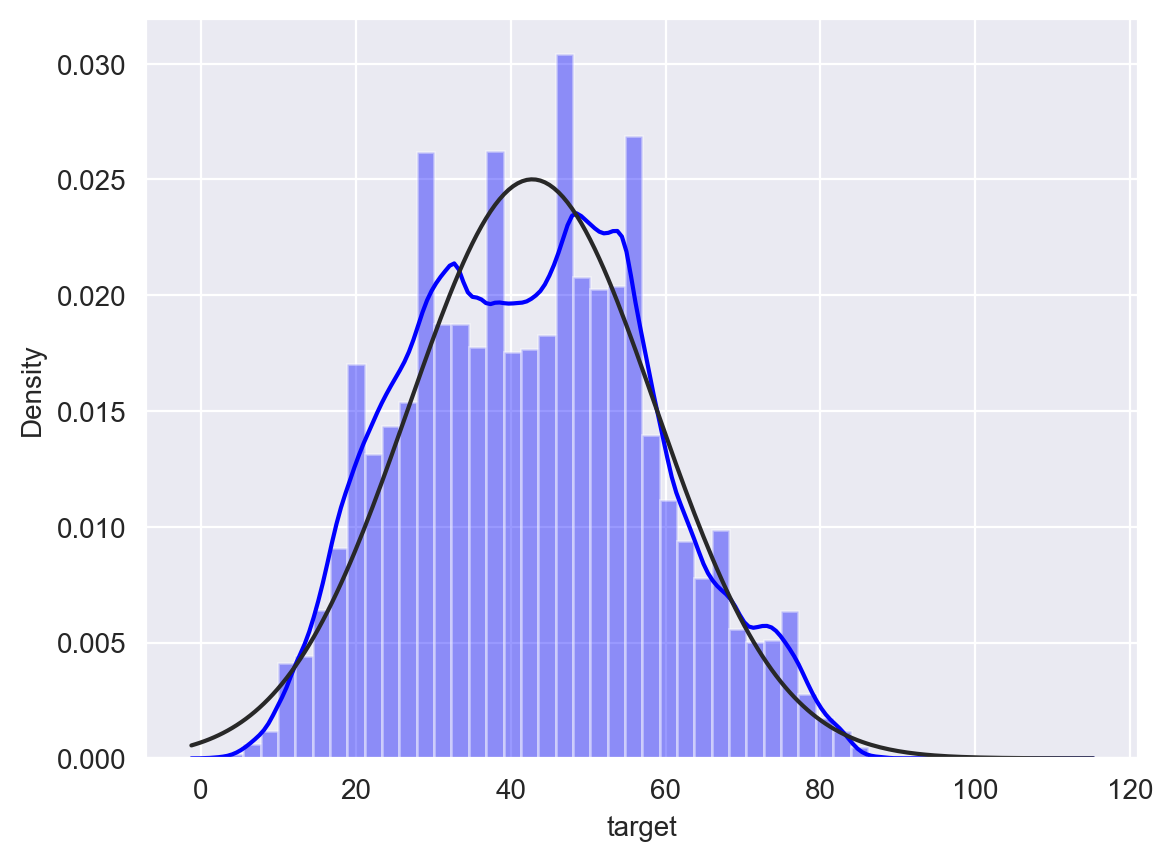

In [63]:
# 분포 확인
# from scipy import stats
from scipy.stats import norm, skew, kurtosis

# distplot
sns.distplot(x_train['target'] , fit=norm, color='blue')

# 왜도, 첨도 확인
(skew, kurt) = skew(x_train['target']), kurtosis(x_train['target'])
print( '\n skew = {:.2f} and kurt = {:.2f}\n'.format(skew, kurt))
plt.show()

4. 데이터 전처리 

결측치 처리하기

도로명('road_name') 컬럼: 결측치('-')가 569,463개 존재하므로, 최대한 대체하기로 결정함
도로명이 '-'인 행의 도로등급('road_rating')이 모두 107이므로, 도로등급이 107이면서 통과제한하중('weight_restricted')이 43200.0, 32400.0일 때 각각의 도로명 값으로 결측치를 대체함

In [65]:
# 도로명 컬럼이 결측치('-')인 행만 따로 추출
road_missing_value = x_train[x_train['road_name'] == '-']
road_missing_value

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
6,TRAIN_0000006,20220106,목,0,2,107,-,60.0,0.0,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
14,TRAIN_0000014,20220203,목,16,1,107,-,60.0,43200.0,3,송목교,33.316913,126.624634,없음,송목교,33.317065,126.623867,없음,58.0
28,TRAIN_0000028,20220612,일,14,2,107,-,50.0,0.0,0,광평교차로,33.330822,126.354179,없음,금악,33.330673,126.354987,없음,59.0
30,TRAIN_0000030,20220623,목,6,2,107,-,80.0,0.0,0,일호유리,33.472276,126.418443,없음,상귀교차로,33.473390,126.409129,없음,75.0
31,TRAIN_0000031,20211028,목,15,1,107,-,60.0,43200.0,3,남수교,33.337244,126.695809,없음,남수교,33.337398,126.696117,없음,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701204,TRAIN_4701204,20211001,금,19,1,107,-,60.0,0.0,0,한남교차로,33.325096,126.665698,없음,서중2교,33.331742,126.676431,없음,55.0
4701205,TRAIN_4701205,20220112,수,19,1,107,-,50.0,0.0,0,감귤창고,33.450215,126.920771,없음,수협,33.448689,126.916358,없음,23.0
4701208,TRAIN_4701208,20220323,수,19,2,107,-,80.0,43200.0,3,제2태흥교,33.287356,126.736525,없음,제2태흥교,33.287582,126.737512,없음,61.0
4701212,TRAIN_4701212,20211104,목,16,1,107,-,50.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0


In [67]:
print(road_missing_value['road_rating'].value_counts())
print(road_missing_value['weight_restricted'].value_counts())

road_rating
107    569463
Name: count, dtype: int64
weight_restricted
0.0        481943
43200.0     68013
32400.0     19507
Name: count, dtype: int64


In [69]:
print(x_train[(x_train['road_rating'] == 107) & (x_train['weight_restricted'] == 43200.0)]['road_name'].value_counts())
print(x_train[(x_train['road_rating'] == 107) & (x_train['weight_restricted'] == 32400.0)]['road_name'].value_counts())

road_name
-      68013
중문로    11336
Name: count, dtype: int64
road_name
-      19507
산서로     7940
Name: count, dtype: int64


In [71]:
# 결측치 대체
print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

x_train.loc[(x_train['road_rating'] == 107) & (x_train['weight_restricted'] == 32400.0) & (x_train['road_name'] == "-"), 'road_name'] = "산서로"
x_train.loc[(x_train['road_rating'] == 107) & (x_train['weight_restricted'] == 43200.0) & (x_train['road_name'] == "-"), 'road_name'] = "중문로"

x_test.loc[(x_test['road_rating'] == 107) & (x_test['weight_restricted'] == 32400.0) & (x_test['road_name'] == "-"), 'road_name'] = "산서로"
x_test.loc[(x_test['road_rating'] == 107) & (x_test['weight_restricted'] == 43200.0) & (x_test['road_name'] == "-"), 'road_name'] = "중문로"

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

결측치 대체 전:  569463
결측치 대체 후:  481943


- 'start_node_name', 'road_name' 컬럼의 조합으로 결측치를 대체함

In [73]:
# 'start_node_name', 'road_name' 컬럼의 조합
for i in x_train['start_node_name'].unique():
    if (len(x_train[(x_train['start_node_name'] == i)]['road_name'].value_counts()) != 2):
        continue
    if "-" in x_train[(x_train['start_node_name'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['start_node_name'] == i)]['road_name'].value_counts())

----------- 송목교 --------------
road_name
중문로    10390
-       5183
Name: count, dtype: int64
----------- 남수교 --------------
road_name
중문로    10360
-       5156
Name: count, dtype: int64
----------- 하귀입구 --------------
road_name
일반국도12호선    10656
-            5190
Name: count, dtype: int64
----------- 양계장 --------------
road_name
-           5330
일반국도12호선    5329
Name: count, dtype: int64
----------- 난산입구 --------------
road_name
지방도1119호선    4923
-            3113
Name: count, dtype: int64
----------- 영주교 --------------
road_name
일반국도11호선    23909
-             472
Name: count, dtype: int64
----------- 서중2교 --------------
road_name
중문로    10380
-       5204
Name: count, dtype: int64
----------- 천제이교 --------------
road_name
-      10930
산서로    10706
Name: count, dtype: int64
----------- 하나로교 --------------
road_name
중문로    10578
-       5282
Name: count, dtype: int64
----------- 신하교 --------------
road_name
중문로    10390
-       5205
Name: count, dtype: int64
----------- 야영장 -----------

In [75]:
node_name_start = ['송목교', '남수교', '하귀입구', '양계장', '난산입구', '영주교', '서중2교', 
                   '천제이교', '하나로교', '신하교', '야영장', '월계교', '서울이용원', '김녕교차로', 
                   '어도초등교', '광삼교', '오렌지농원', '우사', '서귀포시산림조합', '성읍삼거리']

road_name = ['중문로', '중문로', '일반국도12호선', '일반국도12호선', '지방도1119호선', '일반국도11호선', '중문로', 
             '산서로', '중문로', '중문로', '관광단지1로', '산서로', '태평로', '일반국도12호선', 
             '일반국도16호선', '중문로', '일반국도11호선', '일반국도16호선', '지방도1136호선', '일반국도16호선']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(node_name_start)):
    x_train.loc[(x_train['start_node_name'] == node_name_start[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['start_node_name'] == node_name_start[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

결측치 대체 전:  481943
결측치 대체 후:  379668


'end_node_name', 'road_name' 컬럼의 조합으로 결측치를 대체함

In [77]:
# 'end_node_name', 'road_name' 컬럼의 조합
for i in x_train['end_node_name'].unique():
    if (len(x_train[(x_train['end_node_name'] == i)]['road_name'].value_counts()) != 2):
        continue
    if "-" in x_train[(x_train['end_node_name'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['end_node_name'] == i)]['road_name'].value_counts())

----------- 남수교 --------------
road_name
중문로    10360
-       5187
Name: count, dtype: int64
----------- 농협주유소 --------------
road_name
-      8053
산서로    5089
Name: count, dtype: int64
----------- 난산입구 --------------
road_name
지방도1119호선    4978
-            2946
Name: count, dtype: int64
----------- 성읍삼거리 --------------
road_name
일반국도16호선    5030
-           4670
Name: count, dtype: int64
----------- 김녕교차로 --------------
road_name
일반국도12호선    5281
-           3266
Name: count, dtype: int64
----------- 한남교차로 --------------
road_name
중문로    5204
-      5198
Name: count, dtype: int64
----------- 서울이용원 --------------
road_name
태평로    11653
-       1417
Name: count, dtype: int64
----------- 하귀입구 --------------
road_name
일반국도12호선    10661
-            5144
Name: count, dtype: int64
----------- 우사 --------------
road_name
일반국도16호선    7677
-           4784
Name: count, dtype: int64
----------- 어도초등교 --------------
road_name
-           7053
일반국도16호선    5135
Name: count, dtype: int64
---------

In [79]:
node_name_end = ['남수교', '농협주유소', '난산입구', '성읍삼거리', '김녕교차로', '한남교차로', '서울이용원', 
                 '하귀입구', '우사', '어도초등교', '월계교', '양계장', '하나로교', '광삼교', 
                 '수간교차로', '난산사거리', '서중2교', '서귀포시산림조합', '옹포사거리', '진은교차로']

road_name = ['중문로', '산서로', '지방도1119호선', '일반국도16호선', '일반국도12호선', '중문로', '태평로', 
             '일반국도12호선', '일반국도16호선', '일반국도16호선', '산서로', '일반국도12호선', '중문로', '중문로', 
             '일반국도12호선', '지방도1119호선', '중문로', '지방도1136호선', '산서로', '중문로']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(node_name_end)):
    x_train.loc[(x_train['end_node_name'] == node_name_end[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['end_node_name'] == node_name_end[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

결측치 대체 전:  379668
결측치 대체 후:  277900


'start_latitude', 'road_name' 컬럼의 조합으로 결측치를 대체함

In [81]:
# 위도/경도 컬럼의 경우, 6번째 자리까지 반올림함 (반올림해도 train 데이터에서 고유값의 개수는 변하지 않음)
print('반올림 전: ', x_train['start_latitude'].nunique(), x_train['start_longitude'].nunique(), x_train['end_latitude'].nunique(), x_train['end_longitude'].nunique())

x_train[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']] = x_train[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].apply(lambda x: round(x, 6))
x_test[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']] = x_test[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].apply(lambda x: round(x, 6))

print('반올림 후', x_train['start_latitude'].nunique(), x_train['start_longitude'].nunique(), x_train['end_latitude'].nunique(), x_train['end_longitude'].nunique())


반올림 전:  586 586 586 586
반올림 후 586 586 586 586


In [83]:
# 'start_latitude', 'road_name' 컬럼의 조합
for i in x_train['start_latitude'].unique():
    if (len(x_train[(x_train['start_latitude'] == i)]['road_name'].value_counts()) != 2):
        continue
    if "-" in x_train[(x_train['start_latitude'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['start_latitude'] == i)]['road_name'].value_counts())
latitude_start = [33.409416, 33.402546, 33.471164, 33.411255, 33.405319, 
                  33.322018, 33.325096, 33.408431, 33.284189, 33.47339]

road_name = ['산서로', '지방도1119호선', '일반국도12호선', '산서로', '산서로', 
             '중문로', '중문로', '산서로', '중문로', '일반국도12호선']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(latitude_start)):
    x_train.loc[(x_train['start_latitude'] == latitude_start[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['start_latitude'] == latitude_start[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

----------- 33.409416 --------------
road_name
-      3321
산서로    3184
Name: count, dtype: int64
----------- 33.402546 --------------
road_name
-            2953
지방도1119호선    2946
Name: count, dtype: int64
----------- 33.471164 --------------
road_name
-           5334
일반국도12호선    5331
Name: count, dtype: int64
----------- 33.411255 --------------
road_name
-      7382
산서로    4338
Name: count, dtype: int64
----------- 33.405319 --------------
road_name
산서로    4821
-      4159
Name: count, dtype: int64
----------- 33.322018 --------------
road_name
중문로    5198
-      2396
Name: count, dtype: int64
----------- 33.325096 --------------
road_name
중문로    5187
-      5187
Name: count, dtype: int64
----------- 33.408431 --------------
road_name
-      8441
산서로    4777
Name: count, dtype: int64
----------- 33.284189 --------------
road_name
중문로    5306
-      5288
Name: count, dtype: int64
----------- 33.47339 --------------
road_name
-           5344
일반국도12호선    5329
Name: count, dtype: int64

- 'end_latitude', 'road_name' 컬럼의 조합으로 결측치를 대체함

In [85]:
# 'end_latitude', 'road_name' 컬럼의 조합
for i in x_train['end_latitude'].unique():
    if (len(x_train[(x_train['end_latitude'] == i)]['road_name'].value_counts()) != 2):
        continue
    if "-" in x_train[(x_train['end_latitude'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['end_latitude'] == i)]['road_name'].value_counts())

----------- 33.47339 --------------
road_name
-           5338
일반국도12호선    5334
Name: count, dtype: int64
----------- 33.411255 --------------
road_name
산서로    7480
-      4395
Name: count, dtype: int64
----------- 33.412573 --------------
road_name
-      4389
산서로    4199
Name: count, dtype: int64
----------- 33.244882 --------------
road_name
-      5528
산서로    5415
Name: count, dtype: int64
----------- 33.322018 --------------
road_name
중문로    5187
-      2493
Name: count, dtype: int64


In [87]:
latitude_end = [33.47339, 33.411255, 33.412573, 33.244882, 33.322018]

road_name = ['일반국도12호선', '산서로', '산서로', '산서로', '중문로']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(latitude_end)):
    x_train.loc[(x_train['end_latitude'] == latitude_end[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['end_latitude'] == latitude_end[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

결측치 대체 전:  228095
결측치 대체 후:  205952


- 'start_longitude', 'road_name' 컬럼의 조합으로 결측치를 대체함

In [89]:
# 'start_longitude', 'road_name' 컬럼의 조합
for i in x_train['start_longitude'].unique():
    if (len(x_train[(x_train['start_longitude'] == i)]['road_name'].value_counts()) != 2) :
        continue
    if "-" in x_train[(x_train['start_longitude'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['start_longitude'] == i)]['road_name'].value_counts())

----------- 126.258674 --------------
road_name
산서로    4395
-      4190
Name: count, dtype: int64
----------- 126.259693 --------------
road_name
산서로    4389
-      4223
Name: count, dtype: int64


In [91]:
longitude_start = [126.258674, 126.259693]

road_name = ['산서로', '산서로']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(longitude_start)):
    x_train.loc[(x_train['start_longitude'] == longitude_start[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['start_longitude'] == longitude_start[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

결측치 대체 전:  205952
결측치 대체 후:  197539


- 'end_longitude', 'road_name' 컬럼의 조합으로 결측치를 대체함

In [93]:
# 'end_longitude', 'road_name' 컬럼의 조합
for i in x_train['end_longitude'].unique():
    if (len(x_train[(x_train['end_longitude'] == i)]['road_name'].value_counts()) != 2) :
        continue
    if "-" in x_train[(x_train['end_longitude'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['end_longitude'] == i)]['road_name'].value_counts())

----------- 126.261797 --------------
road_name
-      4438
산서로    4223
Name: count, dtype: int64
----------- 126.259693 --------------
road_name
-      4454
산서로    4190
Name: count, dtype: int64


In [95]:
longitude_end = [126.261797 , 126.259693]

road_name = ['산서로', '산서로']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(longitude_end)):
    x_train.loc[(x_train['end_longitude'] == longitude_end[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['end_longitude'] == longitude_end[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

결측치 대체 전:  197539
결측치 대체 후:  188647


파생변수 생성하기
- 연도('year'), 월('month'), 일('day'), 요일('weekday'), 8월과 인접한 달 여부('adjacent_august'), 시간대('시간대'), 계절('season'), 평일/주말여부('주말여부') 컬럼 생성

In [97]:
# 컬럼 타입 변경
x_train['base_date'] = pd.to_datetime(x_train['base_date'].astype('str'))
x_test['base_date'] = pd.to_datetime(x_test['base_date'].astype('str'))

In [99]:
# 연도(year), 월(month) 컬럼 생성
x_train['year'] = x_train['base_date'].dt.year
x_train['month'] = x_train['base_date'].dt.month
x_train['day'] = x_train['base_date'].dt.day
x_train['weekday'] = x_train['base_date'].dt.dayofweek

x_test['year'] = x_test['base_date'].dt.year
x_test['month'] = x_test['base_date'].dt.month
x_test['day'] = x_test['base_date'].dt.day
x_test['weekday'] = x_test['base_date'].dt.dayofweek

In [101]:
# 8월과 인접한 달인 7, 9월인지 아닌지에 따라 구분하는 컬럼 생성
x_train['adjacent_august'] = 'N'
x_test['adjacent_august'] = 'N'

x_train.loc[(x_train['month'] >= 7) & (x_train['month'] <= 9), 'adjacent_august'] = 'Y'
x_test.loc[(x_test['month'] >= 7) & (x_test['month'] <= 9), 'adjacent_august'] = 'Y'

print(x_train['adjacent_august'].value_counts())

adjacent_august
N    3855613
Y     845604
Name: count, dtype: int64


In [103]:
# '시간대': 8~20시(worktime), 21~7시(resttime)
x_train['시간대'] = '0'
x_test['시간대'] = '0'

x_train.loc[(x_train['base_hour'] >= 8) & (x_train['base_hour'] <= 20), '시간대'] = 'worktime'
x_train.loc[(x_train['base_hour'] <= 7) | (x_train['base_hour'] >= 21), '시간대'] = 'resttime'

x_test.loc[(x_train['base_hour'] >= 8) & (x_test['base_hour'] <= 20), '시간대'] = 'worktime'
x_test.loc[(x_train['base_hour'] <= 7) | (x_test['base_hour'] >= 21), '시간대'] = 'resttime'

print(x_train['시간대'].value_counts())

시간대
worktime    2716112
resttime    1985105
Name: count, dtype: int64


In [105]:
# '계절': 봄(3~5월), 여름(6~8월), 가을(9~11월), 겨울(12~2월)
x_train['season'] = '0'
x_test['season'] = '0'

x_train.loc[(x_train['month'] >= 3) & (x_train['month'] <= 5), 'season'] = '봄'
x_train.loc[(x_train['month'] >= 6) & (x_train['month'] <= 8), 'season'] = '여름'
x_train.loc[(x_train['month'] >= 9) & (x_train['month'] <= 11), 'season'] = '가을'
x_train.loc[(x_train['month'] <= 2) | (x_train['month'] == 12), 'season'] = '겨울'

x_test.loc[(x_test['month'] >= 3) & (x_test['month'] <= 5), 'season'] = '봄'
x_test.loc[(x_test['month'] >= 6) & (x_test['month'] <= 8), 'season'] = '여름'
x_test.loc[(x_test['month'] >= 9) & (x_test['month'] <= 11), 'season'] = '가을'
x_test.loc[(x_test['month'] <= 2) | (x_test['month'] == 12), 'season'] = '겨울'

print(x_train['season'].value_counts())

season
겨울    1737202
가을    1229803
봄      969380
여름     764832
Name: count, dtype: int64


In [107]:
# 평일/주말 여부: 'weekday' 컬럼값이 0~4이면 평일, 5~6이면 주말
x_train['주말여부'] = 'Y'
x_test['주말여부'] = 'Y'

x_train.loc[x_train['weekday'] <= 4, '주말여부'] = 'N'

x_test.loc[x_test['weekday'] <= 4, '주말여부'] = 'N'

print(x_train['주말여부'].value_counts())

주말여부
N    3357818
Y    1343399
Name: count, dtype: int64


- 컬럼들의 범주별 평균속도에 차이가 있는지 확인
- 범주별 평균속도에 큰 차이가 없는 'day_of_week', 'weekday', 'year', 'month', 'day', '주말여부' 컬럼 제거
- 'base_hour' 컬럼 제거

In [109]:
# 범주별로 평균속도(target)에 차이가 있는지 확인
category_variable = x_train[['day_of_week', 'start_turn_restricted', 'end_turn_restricted', 
                             'year', 'month', 'day', 'weekday', 'adjacent_august', '시간대', 
                             'season', '주말여부', 'target']]

In [111]:
# 범주별 target 값의 평균에 차이가 있는지 확인
for i in range(len(category_variable.columns)-1):
    print(category_variable.groupby(category_variable.columns[i])['target'].mean())
    print('\n')

day_of_week
금    42.450329
목    42.768345
수    42.770370
월    42.761364
일    43.179298
토    42.894115
화    42.699196
Name: target, dtype: float32


start_turn_restricted
없음    43.610245
있음    35.238968
Name: target, dtype: float32


end_turn_restricted
없음    43.645592
있음    34.916206
Name: target, dtype: float32


year
2021    43.416866
2022    42.382030
Name: target, dtype: float32


month
1     43.033131
2     43.256184
3     43.548672
5     42.639328
6     42.614159
7     36.282303
9     43.694340
10    43.495716
11    43.728214
12    43.030018
Name: target, dtype: float32


day
1     43.030327
2     43.124435
3     42.979557
4     42.948139
5     42.843987
6     43.301701
7     42.846741
8     42.880642
9     42.935852
10    42.917366
11    42.713867
12    43.055782
13    42.852905
14    42.994549
15    43.117218
16    43.281006
17    42.406204
18    42.546124
19    42.755985
20    42.468784
21    42.408405
22    42.606018
23    42.789249
24    42.423531
25    42.651882
26    42.11

불필요한 컬럼 삭제하기

In [113]:
# 범주별 평균속도에 큰 차이가 없는 컬럼 모두 삭제
x_train = x_train.drop(['day_of_week', 'weekday', 'year', 'month', 'day', '주말여부'], axis=1)
x_test = x_test.drop(['day_of_week', 'weekday', 'year', 'month', 'day', '주말여부'], axis=1)
## 분석에 필요하지 않은 컬럼 모두 삭제
x_train = x_train.drop(['base_date', 'base_hour'], axis=1)
x_test = x_test.drop(['base_date', 'base_hour'], axis=1)

In [115]:
len(x_train.columns)

19

이상치 처리하기

In [117]:
print('이상치 처리 전: ', len(x_train))

x_train = x_train[x_train['target'] < 100]

print('이상치 처리 후: ', len(x_train))

이상치 처리 전:  4701217
이상치 처리 후:  4701212


범주형 변수 인코딩하기

In [119]:
# 범주형 변수 라벨인코딩
# 범주형 변수만 따로 추출
category_variables = ['start_node_name', 'end_node_name', 'road_rating', 'road_name', 'maximum_speed_limit', 'weight_restricted', 
                      'road_type', 'start_turn_restricted', 'end_turn_restricted', 'adjacent_august', '시간대', 'season']

# 라벨인코딩
from sklearn.preprocessing import LabelEncoder

for i in category_variables:
    le = LabelEncoder()
    le = le.fit(x_train[i])
    x_train[i] = le.transform(x_train[i])
    
    for label in np.unique(x_test[i]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    x_test[i] = le.transform(x_test[i])

5. 학습 및 평가

In [120]:
# 'index' 컬럼 따로 저장해두기
x_test_index = x_test['id']

x_train = x_train.drop('id', axis=1)
x_test = x_test.drop('id', axis=1)

In [123]:
# target 변수 따로 저장
Y_train = x_train['target']
X_train = x_train.drop('target', axis=1)
X_test = x_test.copy()

검증을 위한 데이터 분리

In [125]:
from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X_train, Y_train, test_size=0.2, random_state=10)

print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(3760969, 17)
(940243, 17)
(3760969,)
(940243,)


5.1 XGBoost

In [ ]:
pip install xgboost

In [127]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, learning_rate=0.17, 
                         max_depth=11, min_child_weight=1, 
                         colsample_bytree=1, random_state=10)
xgb.fit(X_TRAIN, Y_TRAIN)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.17, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, ...)

In [129]:
# 결과 예측
pred_xgb = pd.DataFrame(xgb.predict(X_test)).rename(columns={0:'target'})
print(pred_xgb)

           target
0       28.492289
1       43.796562
2       62.424747
3       39.644985
4       42.518677
...           ...
291236  47.113110
291237  53.048172
291238  37.532726
291239  21.442287
291240  47.048241

[291241 rows x 1 columns]


In [131]:
# 모델 평가
from sklearn.metrics import mean_absolute_error
PRED_XGB = pd.DataFrame(xgb.predict(X_TEST)).rename(columns={0:'target'})
print(mean_absolute_error(Y_TEST, PRED_XGB))

3.834231


5.2 LGBM

In [ ]:
pip install lightgbm

In [133]:
# 모형 학습
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(num_iterations=500, learning_rate=0.17, 
                           max_depth=11, min_child_weight=1, 
                           colsample_bytree=1, random_state=10)
lgbm.fit(X_TRAIN, Y_TRAIN)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1592
[LightGBM] [Info] Number of data points in the train set: 3760969, number of used features: 17
[LightGBM] [Info] Start training from score 42.784687


LGBMRegressor(colsample_bytree=1, learning_rate=0.17, max_depth=11,
              min_child_weight=1, num_iterations=500, random_state=10)

In [135]:
# 결과 예측
pred_lgbm = pd.DataFrame(lgbm.predict(X_test)).rename(columns={0:'target'})
print(pred_lgbm)

           target
0       28.538924
1       43.886435
2       61.707300
3       37.953477
4       40.815808
...           ...
291236  46.548462
291237  53.420539
291238  35.980124
291239  21.173778
291240  45.226529

[291241 rows x 1 columns]


In [137]:
# 모델 평가
from sklearn.metrics import mean_absolute_error
PRED_LGBM = pd.DataFrame(lgbm.predict(X_TEST)).rename(columns={0:'target'})
print(mean_absolute_error(Y_TEST, PRED_LGBM))

3.8770249864529744


5.3 랜덤포레스트 + 엑스트라트리 앙상블

In [139]:
from sklearn.model_selection import StratifiedKFold as kfold
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

kf = kfold(n_splits = 3, shuffle = True, random_state = 42)
split = kf.split(X_train, Y_train)

# 평균 MAE을 확인하기 위해 리스트 생성
mae_list1 = []
mae_list2 = []

# fold별 예측값을 저장하기 위한 리스트 생성
test_pred_list1 = []
test_pred_list2 = []

for train, test in split:
    x_train, x_val, y_train, y_val = X_train.iloc[train], X_train.iloc[test], Y_train.iloc[train], Y_train.iloc[test]    

    rf = RandomForestRegressor(n_estimators=40, min_samples_leaf=10,
                                min_samples_split=10, random_state=2022)
    et = ExtraTreesRegressor(n_estimators = 40, min_samples_split=10, min_samples_leaf = 10, random_state = 2022)

    rf.fit(x_train, y_train)
    et.fit(x_train, y_train)

    pred1 = rf.predict(x_val)
    pred2 = et.predict(x_val)

    result1 = mean_absolute_error(pred1,y_val)
    result2 = mean_absolute_error(pred2,y_val)

    mae_list1.append(result1)
    mae_list2.append(result2)

    print(f'RandomForestRegressor mae : {result1:.4f}', end='\n\n')
    print(f'ExtraTreeRegressor mae : {result2:.4f}', end='\n\n')
    
    test_pred_list1.append(rf.predict(X_test))
    test_pred_list2.append(et.predict(X_test))

print(f'mean mae {np.mean(mae_list1):.4f}')
print(f'mean mae {np.mean(mae_list2):.4f}')

RandomForestRegressor mae : 3.8010

ExtraTreeRegressor mae : 3.8009

RandomForestRegressor mae : 3.7991

ExtraTreeRegressor mae : 3.7991

RandomForestRegressor mae : 3.7996

ExtraTreeRegressor mae : 3.7994

mean mae 3.7999
mean mae 3.7998
